<span style="color:orange;font-weight:700;font-size:20px">

# Task 4 - Time Series and Simple Linear Regression <br>
</span>

Author: [Adrian Vega](https://github.com/adriacv17) <br >Respository: [datafun-07-ml-predictive](https://github.com/adriacv17/datafun-07-ml-predictive) <br> Data: 10/02/2023 <br>Implement 10.16 and 15.4


## Part 1 - Linear Regression

### Celsius vs Fahrenheit Conversion

In [113]:
import pandas as pd #import libraries


# c = 5/9 * (f-32) conversion equation from Fahrenheit to Celsius

c = lambda f:5/9 * (f-32) # conversion using above formula
temps = [(f,c(f)) for f in range(0 ,101, 10)] #calculate Celsius equivalents of Fahrenheit 0-100 in 10 degree increments

### Place data in DataFrame

In [114]:
temps_df= pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius']) #data frame created from tuple conversion above.


### Plot DataFrame Celsius vs Fahrenheit

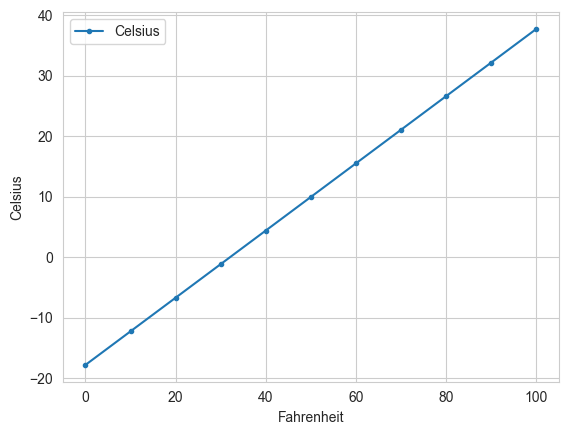

In [115]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-') #plot method for labeling and line style(y label only labels legend)
y_label = axes.set_ylabel('Celsius') # set label for dependent variable y axis

### Section 1 - Load: Follow the instructions to load NY City January high temperature from a csv file into a DataFrame

In [116]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv') # load CSV into DataFrame

nyc #call DataFrame

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


### Section 2 - View: Follow the instructions to view head and tail of the file. 

#### Head of DataFrame

In [117]:
nyc.head() #view head of file


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


#### Tail of DataFrame

In [118]:
nyc.tail() # view tail of file

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Clean: Follow the instructions to clean the data.

In [119]:
nyc.columns= ['Date', 'Temperature', 'Anomaly'] # Renaming value to temperature for readablity

nyc.head(3) #show top 3 to confirm change

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [120]:
# Removing the 01(January) from the Date column

#first check type of data
nyc.Date.dtype


dtype('int64')

In [121]:
#data type is int, use floordiv to divide 100 to truncate the last two digits
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3) #call head of DataFrame

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Describe: Use describe() to calculate basic descriptive statistics for the dataset. 

In [122]:
pd.set_option('display.precision', 2) #format for floating-point values

nyc.Temperature.describe() #call describe() function on Temperature column

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Calculate Line: Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [123]:
from scipy import stats #import stats module from Scientific Python Library(SciPy)

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature) #Use linregress fuction from stats module to calculate slope and intercept


#### Slope

In [124]:
linear_regression.slope #call slope 

0.014771361132966163

#### Intercept

In [125]:
linear_regression.intercept #call intercept

8.694993233674289

### Section 6 - Predict: Use your results to predict the "average high temp in Jan" for the year 2026.

In [126]:
linear_regression.slope * 2026 + linear_regression.intercept #add year(x) to equation y = mx + b 

38.62177088906374

### Section 7 - Plot: Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

(10.0, 70.0)

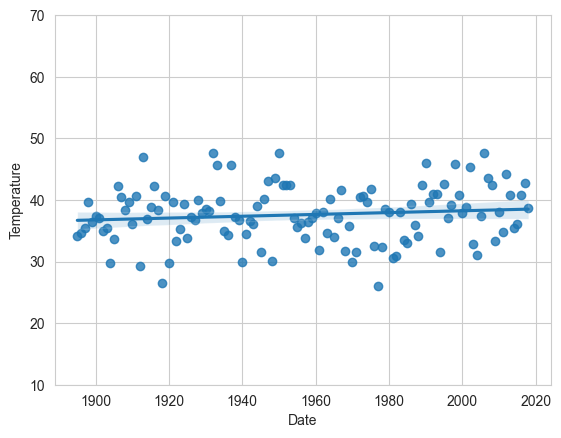

In [127]:
import seaborn as sns #import seaborn

sns.set_style('whitegrid') #select style of grid using set_style

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature) # name variables to plot for x and y

axes.set_ylim(10, 70) #scale the y-axis from 21.5 degree range to 60 degree range(10-70)